In [ ]:
import os
import logging

from tqdm.notebook import tqdm
from torch.utils.data import Subset
from IPython.display import display

from exrep.comparative import load_experiment
from exrep.attribution import attribute_embeddings, get_top_abs

if 'notebooks' in os.getcwd():
    os.chdir("..")

# logging.basicConfig(level=logging.INFO)

device = 'cuda'

In [ ]:
run_name = "worthy-dream-660"
dataset_name = "imagenet"
(model, vocab), clip_model, (dataset, viz_dataset), _ = load_experiment(
    dataset_name = dataset_name,
    run_name = run_name,
    ckpt_path = f"outputs/{dataset_name}/ckpts/{run_name}_best_val-acc.pt",
    enc_path = f"outputs/{dataset_name}/average_20_encoding.pkl",
    split = "val",
    device = 'cuda',
    load_baseline = False,
)

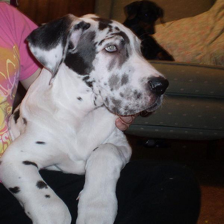

Top concepts for image 12345, label 246: 
Concept(lemma='dane', pos='n'): 0.264
Concept(lemma='dalmatian', pos='a'): 0.218
Concept(lemma='puppy', pos='n'): 0.139
Concept(lemma='great', pos='a'): 0.086
Concept(lemma='lap', pos='v'): 0.082
Concept(lemma='lap', pos='n'): 0.082
Concept(lemma='kitchen', pos='n'): 0.021
Concept(lemma='woman', pos='n'): 0.020
Concept(lemma='hand', pos='n'): 0.020
Concept(lemma='dark', pos='a'): 0.015


In [ ]:
# obtain the representation concept score for a single image
i = 12345
topk_concepts = 10

attributions = attribute_embeddings(model, Subset(dataset, [i]), device=device)
values, indices = get_top_abs(attributions[0], dim=0, k=topk_concepts)
concepts = [vocab[i] for i in indices]

display(viz_dataset[i][0].resize((224, 224)))
print(f"Top concepts for image {i}, label {viz_dataset[i][1]}: ")
for c, v in zip(concepts, values):
    print(f"{c}: {v:.3f}")